<a href="https://colab.research.google.com/github/iam-fern/DPDM/blob/master/Kmean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=6)     # fixed ให้ random_state คือทุกคนจะได้ค่าเท่ากัน

In [3]:
x.shape

(300, 2)

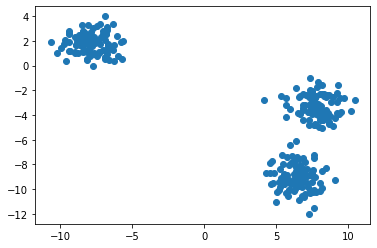

In [4]:
from matplotlib import pyplot as plt
plt.scatter(x[:,0], x[:,1])

## Import

In [5]:
from sklearn.cluster import KMeans

## Define : ตั้งค่าแอลกอลิทึม

In [8]:
KMclust = KMeans(n_clusters=3)

## Predict

In [13]:
KMclust.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
label = KMclust.predict(x)

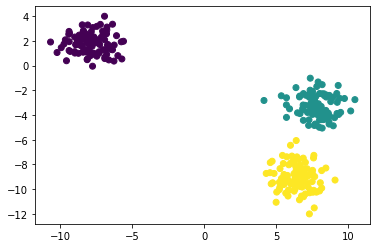

In [17]:
plt.scatter(x[:,0], x[:,1], c=label)

## Color quantization

In [28]:
from google.colab import drive
drive.mount('/content/drive')
import os
path = '/content/drive/My Drive/DWDM_material'
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['test.csv',
 'metadata.xlsx',
 'search_click.csv',
 'w_restaurant.csv',
 'Copy of search_click.csv',
 '03 สังคม.xls',
 '52835793_259306464964511_3851804852342489088_n.png',
 'reduced_marketbasket.csv',
 'Copy of w_restaurant.csv',
 'Preprocessing02.html',
 'teach02.csv',
 'teach.csv',
 'data2.csv',
 'data1.csv',
 'data3.csv',
 'data4.csv',
 'baboon.jpg']

In [23]:
import cv2
import os

In [35]:
img = cv2.imread(os.path.join(path, 'baboon.jpg'))

In [36]:
img.shape

(446, 320, 3)

In [37]:
img

array([[[22, 27, 30],
        [10, 15, 18],
        [10, 15, 18],
        ...,
        [ 0,  0,  6],
        [ 4,  3, 12],
        [25, 24, 33]],

       [[15, 20, 23],
        [ 5, 10, 13],
        [ 6, 11, 14],
        ...,
        [ 6,  5, 14],
        [ 9,  8, 17],
        [ 4,  3, 12]],

       [[11, 16, 19],
        [ 2,  7, 10],
        [ 1,  6,  9],
        ...,
        [13, 12, 21],
        [16, 15, 24],
        [ 7,  6, 15]],

       ...,

       [[14, 10,  9],
        [12,  8,  7],
        [17, 13, 12],
        ...,
        [16, 11, 10],
        [ 9,  4,  3],
        [ 8,  3,  2]],

       [[14, 10,  9],
        [13,  9,  8],
        [18, 14, 13],
        ...,
        [15, 10,  9],
        [ 7,  2,  1],
        [ 7,  2,  1]],

       [[14, 10,  9],
        [13,  9,  8],
        [18, 14, 13],
        ...,
        [15, 10,  9],
        [ 7,  2,  1],
        [ 6,  1,  0]]], dtype=uint8)

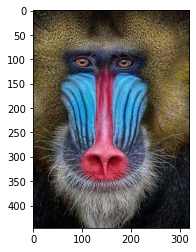

In [38]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(RGB_img)

## count unique colors

In [39]:
import numpy as np

In [40]:
np.unique(RGB_img).shape

(256,)

## Use K-mean to reduce colors

In [59]:
# Define
myQuantize = KMeans(n_clusters=7)

In [60]:
img_row = np.reshape(RGB_img, (446*320, 3))
img_row

array([[30, 27, 22],
       [18, 15, 10],
       [18, 15, 10],
       ...,
       [ 9, 10, 15],
       [ 1,  2,  7],
       [ 0,  1,  6]], dtype=uint8)

In [61]:
# Train
myQuantize.fit(img_row)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
# Predict
res = myQuantize.predict(img_row)
res

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

## Get cluster centers

In [64]:
Clus_cen = myQuantize.cluster_centers_
Clus_cen

array([[ 78.41438903,  64.21430137,  44.78125294],
       [172.54696401, 149.94247603, 153.20758649],
       [122.52349017, 110.98591649,  91.26402174],
       [ 72.07884033, 157.05382951, 205.09138901],
       [ 24.37117722,  21.51510892,  19.85466281],
       [175.31731062,  61.1490721 ,  89.1606328 ],
       [ 62.12569541,  79.00538943, 102.34961752]])

In [65]:
Clus_cen.shape

(7, 3)

## Map color back to the image

In [66]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
  for j in range(RGB_img.shape[1]):
    new_img[i,j,:] = Clus_cen[myQuantize.predict([RGB_img[i,j,:]]),:]

In [67]:
new_img_ = new_img/255

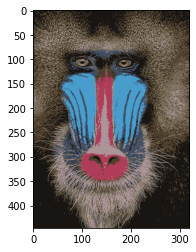

In [68]:
plt.imshow(new_img_)